# Understanding Regularization

#### Python Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.style.use('seaborn')
np.random.seed(101)

In [3]:
x = np.array([1.8, 1.5, 2.1, 2.4, 1.7])
y = np.array([24, 21, 32, 36, 23])

#### Find the Covariance

In [4]:
bar_x = x.mean()
print('Mean x: %0.3f' % bar_x)
bar_y = y.mean()
print('Mean y: %0.3f' % bar_y)
cov_xy = ((x - bar_x) * (y - bar_y)).sum() / (x.size - 1)
print('Covariance: %0.3f' % cov_xy)

Mean x: 1.900
Mean y: 27.200
Covariance: 2.250


#### Covariance using numpy

In [5]:
np.cov(x, y)

array([[ 0.125,  2.25 ],
       [ 2.25 , 41.7  ]])

#### Find the Correlation

In [6]:
std_x = x.std(ddof=1)
print('Sigma x: %0.3f' % std_x)
std_y = y.std(ddof=1)
print('Sigma y: %0.3f' % std_y)
rho_xy = cov_xy / (std_x * std_y)
print('Correlation: %0.3f' % rho_xy)

Sigma x: 0.354
Sigma y: 6.458
Correlation: 0.986


#### Correlation using numpy

In [7]:
np.corrcoef(x, y)

array([[1.        , 0.98550648],
       [0.98550648, 1.        ]])

#### Create data points for intuition of regularization

In [8]:
x_train = np.array([1, 2, 4, 5, 7, 8, 10])
x_test = np.array([3, 6, 9])
y_train = np.array([2, 3.5, 2.8, 4.7, 2.7, 5.6, 4.3])
y_test = np.array([1.5, 2.7, 2.1])
x_all = np.append(x_train, x_test)

#### Plot the hypothetical (assumed) line of best fit

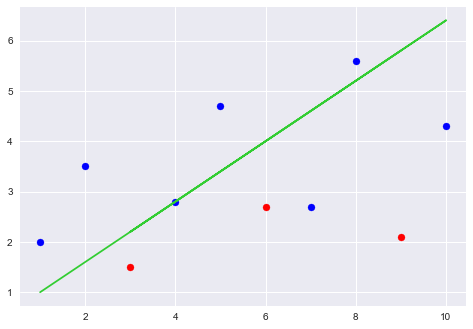

In [9]:
yhat_sim = 0.6 * x_all + 0.4
plt.plot(x_all, yhat_sim, color='limegreen')
plt.scatter(x_train, y_train, color='blue')
plt.scatter(x_test, y_test, color='red')
plt.show()

#### Plot the regularized line of best fit (adjust slope)

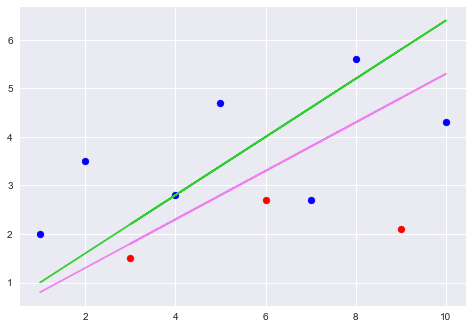

In [10]:
yhat_sim_reg = 0.5 * x_all + 0.3
plt.plot(x_all, yhat_sim, color='limegreen')
plt.plot(x_all, yhat_sim_reg, color='violet')
plt.scatter(x_train, y_train, color='blue')
plt.scatter(x_test, y_test, color='red')
plt.show()

#### Display the L1 norm plot

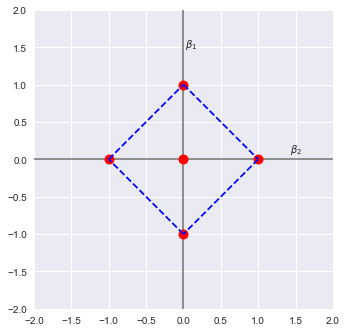

In [11]:
plt.xlim(-2.0, 2.0)
plt.ylim(-2.0, 2.0)
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.annotate('$\\beta_1$', (0.1, 1.5), xytext=(0.1, 1.5), ha='center')
plt.annotate('$\\beta_2$', (1.5, 0.1), xytext=(1.5, 0.1), ha='center')
plt.plot(0, 0, 'ro', markersize=10)
plt.plot(0, 1, 'ro', markersize=10)
plt.plot(1, 0, 'ro', markersize=10)
plt.plot(0, -1, 'ro', markersize=10)
plt.plot(-1, 0, 'ro', markersize=10)
plt.plot([0, 1], [1, 0], color='blue', linestyle='--')
plt.plot([1, 0], [0, -1], color='blue', linestyle='--')
plt.plot([0, -1], [-1, 0], color='blue', linestyle='--')
plt.plot([-1, 0], [0, 1], color='blue', linestyle='--')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

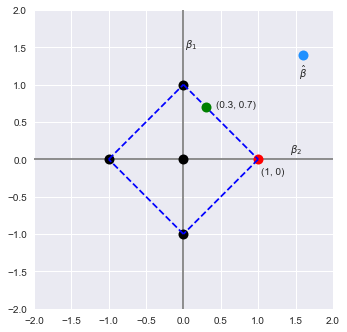

In [12]:
plt.xlim(-2.0, 2.0)
plt.ylim(-2.0, 2.0)
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.annotate('$\\beta_1$', (0.1, 1.5), xytext=(0.1, 1.5), ha='center')
plt.annotate('$\\beta_2$', (1.5, 0.1), xytext=(1.5, 0.1), ha='center')
plt.plot(0, 0, 'ko', markersize=10)
plt.plot(0, 1, 'ko', markersize=10)
plt.plot(1, 0, color='red', marker='o', markersize=10)
plt.annotate('(1, 0)', (1.2, -0.2), xytext=(1.2, -0.2), ha='center')
plt.plot(0, -1, 'ko', markersize=10)
plt.plot(-1, 0, 'ko', markersize=10)
plt.plot([0, 1], [1, 0], color='blue', linestyle='--')
plt.plot([1, 0], [0, -1], color='blue', linestyle='--')
plt.plot([0, -1], [-1, 0], color='blue', linestyle='--')
plt.plot([-1, 0], [0, 1], color='blue', linestyle='--')
plt.plot(1.6, 1.4, color='dodgerblue', marker='o', markersize=10)
plt.annotate('$\\hat{\\beta}$', (1.6, 1.1), xytext=(1.6, 1.1), ha='center')
plt.plot(0.3, 0.7, color='green', marker='o', markersize=10)
plt.annotate('(0.3, 0.7)', (0.7, 0.7), xytext=(0.7, 0.7), ha='center')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

#### Display the L2 norm plot

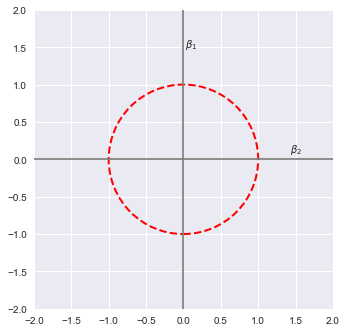

In [13]:
plt.xlim(-2.0, 2.0)
plt.ylim(-2.0, 2.0)
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.annotate('$\\beta_1$', (0.1, 1.5), xytext=(0.1, 1.5), ha='center')
plt.annotate('$\\beta_2$', (1.5, 0.1), xytext=(1.5, 0.1), ha='center')
circle = plt.Circle((0, 0), 1, lw=2, color='red', linestyle='--', fill=False)
plt.gca().add_patch(circle)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

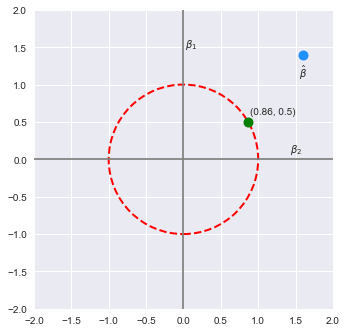

In [14]:
plt.xlim(-2.0, 2.0)
plt.ylim(-2.0, 2.0)
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.annotate('$\\beta_1$', (0.1, 1.5), xytext=(0.1, 1.5), ha='center')
plt.annotate('$\\beta_2$', (1.5, 0.1), xytext=(1.5, 0.1), ha='center')
circle = plt.Circle((0, 0), 1, lw=2, color='red', linestyle='--', fill=False)
plt.gca().add_patch(circle)
plt.plot(1.6, 1.4, color='dodgerblue', marker='o', markersize=10)
plt.annotate('$\\hat{\\beta}$', (1.6, 1.1), xytext=(1.6, 1.1), ha='center')
plt.plot(0.86, 0.5, color='green', marker='o', markersize=10)
plt.annotate('(0.86, 0.5)', (1.2, 0.6), xytext=(1.2, 0.6), ha='center')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()